In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [32]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [34]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [36]:
df.shape

(319795, 18)

In [38]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [40]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [42]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

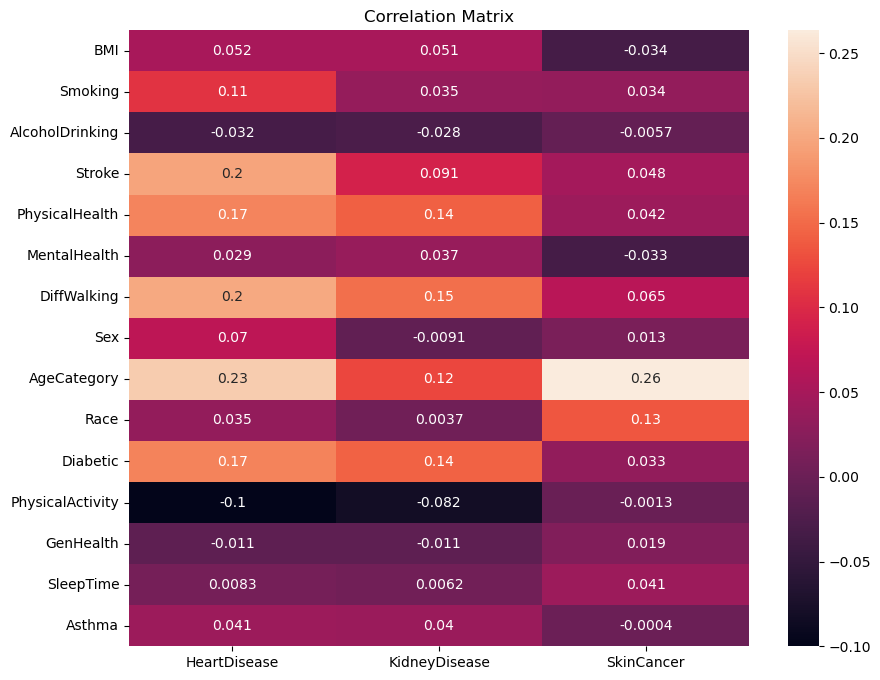

Top 10 factors with strongest correlation to heart disease:
AgeCategory       0.233432
DiffWalking       0.201258
Stroke            0.196835
PhysicalHealth    0.170721
Diabetic          0.168553
Smoking           0.107764
Sex               0.070040
BMI               0.051803
Asthma            0.041444
Race              0.034854
Name: HeartDisease, dtype: float64 

Top 10 factors with strongest correlation to kidney disease:
DiffWalking       0.153064
Diabetic          0.142917
PhysicalHealth    0.142197
AgeCategory       0.123190
Stroke            0.091167
BMI               0.050768
Asthma            0.039707
MentalHealth      0.037281
Smoking           0.034920
SleepTime         0.006238
Name: KidneyDisease, dtype: float64 

Top 10 factors with strongest correlation to skin cancer:
AgeCategory       0.263537
Race              0.134780
DiffWalking       0.064840
Stroke            0.048116
PhysicalHealth    0.041700
SleepTime         0.041266
Smoking           0.033977
Diabetic         

In [48]:
# 1. Which factors have the strongest correlation with Heart Disease, Kidney Disease, and Skin Cancer?
label_encoder = LabelEncoder()

# Label encoding categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Correlation matrix
correlation_matrix = df.corr()
diseases = ['HeartDisease', 'KidneyDisease', 'SkinCancer']
correlation_matrix = correlation_matrix[diseases]
correlation_matrix = correlation_matrix.drop(['HeartDisease', 'KidneyDisease', 'SkinCancer'], axis = 0)

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

# Get the correlation
strongest_heart = correlation_matrix['HeartDisease'].sort_values(ascending = False)[0:10]
strongest_kidney = correlation_matrix['KidneyDisease'].sort_values(ascending = False)[0:10]
strongest_skin = correlation_matrix['SkinCancer'].sort_values(ascending = False)[0:10]

print('Top 10 factors with strongest correlation to heart disease:')
print(strongest_heart, '\n')
print('Top 10 factors with strongest correlation to kidney disease:')
print(strongest_kidney, '\n')
print('Top 10 factors with strongest correlation to skin cancer:')
print(strongest_skin, '\n')

In [9]:
# 2. Predict diseases based on features
Y = df[['HeartDisease', 'KidneyDisease', 'SkinCancer']]
Y_heart = df[['HeartDisease']]
Y_kidney = df[['KidneyDisease']]
Y_skin = df[['SkinCancer']]
X = df.drop(Y.columns, axis = 1)

# Heart disease
print('Heart Disease Modeling')
X_heart_train, X_heart_test, Y_heart_train, Y_heart_test = train_test_split(
    X, Y_heart.values.ravel(), test_size = 0.3, stratify = Y_heart)

# Logistic Regression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_heart_train, Y_heart_train)
Y_heart_pred = log_reg.predict(X_heart_test)
f1_heart = f1_score(Y_heart_test, Y_heart_pred)
print('Logistic Regression:', f1_heart)

# KNN
scaler = StandardScaler()
X_heart_train = scaler.fit_transform(X_heart_train)
X_heart_test = scaler.transform(X_heart_test)
knn = KNeighborsClassifier(n_neighbors = 21, algorithm = 'ball_tree')
knn.fit(X_heart_train, Y_heart_train)
Y_heart_pred = knn.predict(X_heart_test)
f1_heart = f1_score(Y_heart_test, Y_heart_pred)
print('KNN:', f1_heart)

# Kidney disease
print('Kidney Disease Modeling')
X_kidney_train, X_kidney_test, Y_kidney_train, Y_kidney_test = train_test_split(
    X, Y_kidney.values.ravel(), test_size = 0.3, stratify = Y_kidney)

# Logistic Regression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_kidney_train, Y_kidney_train)
Y_kidney_pred = log_reg.predict(X_kidney_test)
f1_kidney = f1_score(Y_kidney_test, Y_kidney_pred)
print('Logistic Regression:', f1_kidney)

# KNN
scaler = StandardScaler()
X_kidney_train = scaler.fit_transform(X_kidney_train)
X_kidney_test = scaler.transform(X_kidney_test)
knn = KNeighborsClassifier(n_neighbors = 21, algorithm = 'ball_tree')
knn.fit(X_kidney_train, Y_kidney_train)
Y_kidney_pred = knn.predict(X_kidney_test)
f1_kidney = f1_score(Y_kidney_test, Y_kidney_pred)
print('KNN:', f1_kidney)

# Skin cancer
print('Skin Cancer Modeling')
X_skin_train, X_skin_test, Y_skin_train, Y_skin_test = train_test_split(
    X, Y_skin.values.ravel(), test_size = 0.3, stratify = Y_skin)

# Logistic Regression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_skin_train, Y_skin_train)
Y_skin_pred = log_reg.predict(X_skin_test)
f1_skin = f1_score(Y_skin_test, Y_skin_pred)
print('Logistic Regression:', f1_skin)

# KNN
scaler = StandardScaler()
X_skin_train = scaler.fit_transform(X_skin_train)
X_skin_test = scaler.transform(X_skin_test)
knn = KNeighborsClassifier(n_neighbors = 21, algorithm = 'ball_tree')
knn.fit(X_skin_train, Y_skin_train)
Y_skin_pred = knn.predict(X_skin_test)
f1_skin = f1_score(Y_skin_test, Y_skin_pred)
print('KNN:', f1_skin)

Heart Disease Modeling
Logistic Regression: 0.1438384679433805
KNN: 0.12731310140636565
Kidney Disease Modeling
Logistic Regression: 0.0039469974626444885
KNN: 0.0016915703411333521
Skin Cancer Modeling
Logistic Regression: 0.0008937548877220422
KNN: 0.011392266403768211
